In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras.losses import BinaryCrossentropy
from keras.models import Sequential

Estimation of Reflectivity-precipitation correlation with ANN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Lecture-11/precip_zFactor.xlsx', usecols='A:B')
data


,Precipitation (mm/hr),Reflectivity (dBZ)
0,0.205,15.471
1,3.401,34.442
2,0.359,18.498
3,1.974,30.818
4,10.844,41.443
...,...,...
4326,0.824,21.014
4327,0.305,14.854
4328,0.283,15.020
4329,1.815,27.717


In [ ]:
data.shape

(4331, 2)

In [ ]:
data.info()
data.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4331 entries, 0 to 4330
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Precipitation (mm/hr)  4331 non-null   float64
 1   Reflectivity (dBZ)     4331 non-null   float64
dtypes: float64(2)
memory usage: 67.8 KB


0

The table contains Rainfall rate(mm/hr) and Reflectivity(dBZ).<br>
We have a total of 4331 observations with no null values present.

Here Reflectivity is the input variable and Rainfall is the target variable, in other words we need to build a model which predicts the Rainfall for a given Radar Reflectivity value.

Text(0, 0.5, 'Rainfall (mm/hr)')

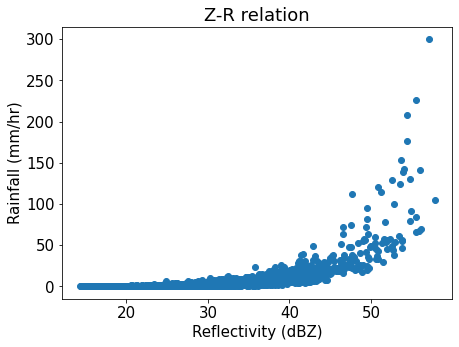

In [ ]:
# Scatter plot between X and Y
fig = plt.figure(figsize=(7,5))
plt.rc('font', size=15)    # fontsize of the all text
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('xtick', labelsize=15) 
ax = fig.add_subplot(1,1,1)
#ax.boxplot(data.iloc[:,0])
ax.scatter(data.iloc[:,1],data.iloc[:,0])
ax.set_title('Z-R relation')
ax.set_xlabel('Reflectivity (dBZ)')
ax.set_ylabel('Rainfall (mm/hr)')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/Lecture-11/Z-R relation.png',dpi=1250,bbox_inches='tight',pad_inches=0.1)

# Data Normalisation

In [ ]:
x = np.array(data.iloc[:,1]).reshape(-1,1) # reflectivity in dBZ
y = np.array(data.iloc[:,0]).reshape(-1,1) # Rainfall in 1/10th of mm
x_scaler = StandardScaler().fit(x)
y_scaler = StandardScaler().fit(y)
scaled_x = x_scaler.transform(x)
scaled_y = y_scaler.transform(y)


In [ ]:
x_scaler

StandardScaler()

# Split the data into 70% training and 30% testing samples using train_test_split function

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.3, random_state=1)
print(f"Train_x shape: {x_train.shape}",f"Train_y shape: {y_train.shape}",f"Test_x shape: {x_test.shape}",f"Test_y shape: {y_test.shape}")

Train_x shape: (3031, 1) Train_y shape: (3031, 1) Test_x shape: (1300, 1) Test_y shape: (1300, 1)


Build Artificial Neural Netwrok(ANN) with one input, one output and three hidden layer with 12 neurons.<br>
Take sigmoid as the nonlinearity at each node.

In [ ]:
x_train.shape[0]

3031

In [ ]:
# Stacked ANN with multiple hidden dense layers
## -------- Typical model building lies withing this block -------- ##
model = Sequential()
# Every model which has to transfer information betwen several layers will be called upon by the Sequential() function.
model.add(Dense(12, input_dim=x_train.shape[1], activation='sigmoid'))
# The Dense() function represents an Artificial neural network
model.add(Dense(12, activation='sigmoid'))
# Which takes number of neurons, dimension of previous layer size, and the activation function as inputs
model.add(Dense(12, activation='sigmoid'))
# the activation function can be sigmoid, relu or tanh.
model.add(Dense(1))
# Final layer is the output layer, which have one neuron and no activation function
model.compile(optimizer='adam', loss='mean_squared_error')
# The adam gradient optimiser with MSE cost is used for optimisation
# The optimiser takes a bunch of parameters, including the learning rate.
# If the laerning rate is not specified, it will take the default value of 0.001
## -------- Typical model building lies withing this block -------- ##
model.summary() # summary visualises the built model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 349
Trainable params: 349
Non-trainable params: 0
_________________________________________________________________


# Parameters basically means weights.

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


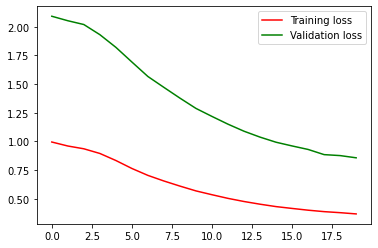

In [ ]:
## -------- Model training lies withing this block -------- ##
history = model.fit(x_train, y_train, validation_split=0.1, verbose=0.2, epochs=20)
# 10% of training samples are used for validation of the model, which will let us know whether the validation curves and training curves meet.
## -------- Model training lies withing this block -------- ##
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')
plt.legend(['Training loss', 'Validation loss'])

Time to obtain the model predictions corresponding to training and testing samples, to examine the model accuracy


In [ ]:
train_prediction = model.predict(x_train)
inverse_train_prediction = y_scaler.inverse_transform(train_prediction)
inverse_y_train = y_scaler.inverse_transform(y_train)
train_R2 = round(r2_score(inverse_y_train,inverse_train_prediction),3)
print('ANN training accuracy R2 =', train_R2)

ANN training accuracy R2 = 0.623


In [ ]:
test_prediction = model.predict(x_test) 
# inverse_scaler is used to get back the data in original unscaled format so it will be more meaningful when visualising.
inverse_test_prediction = y_scaler.inverse_transform(test_prediction)
inverse_y_test = y_scaler.inverse_transform(y_test)
test_R2 = round(r2_score(inverse_y_test,inverse_test_prediction),3)
print('ANN test accuracy R^2 = ',test_R2)

ANN test accuracy R^2 =  0.647


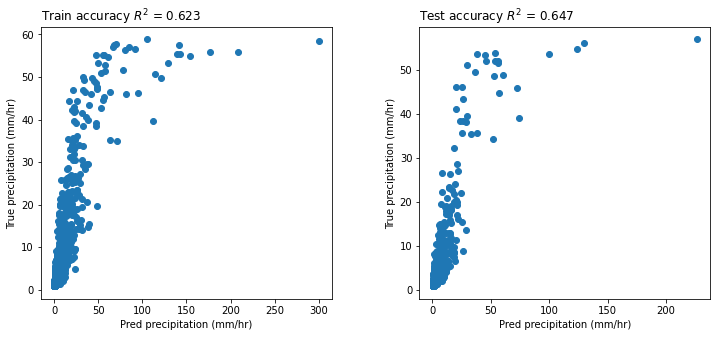

In [ ]:
## -------- Plotting of identity maps with the obtained accuracy values lies within this block -------- ##
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1) # represent 11 input sizes and two columns of figures
ax.scatter(inverse_y_train,inverse_train_prediction)
ax.set_title('Train accuracy $R^2$ = '+str(train_R2),loc='left')
ax.set_ylabel('True precipitation (mm/hr)')
ax.set_xlabel('Pred precipitation (mm/hr)')

count = 0
ax = fig.add_subplot(1,2,2)
ax.scatter(inverse_y_test,inverse_test_prediction)
ax.set_title('Test accuracy $R^2$ = '+str(test_R2),loc='left')
ax.set_ylabel('True precipitation (mm/hr)')
ax.set_xlabel('Pred precipitation (mm/hr)')
count = count+1
plt.subplots_adjust(wspace=0.3,hspace=0.5)
## -------- Plotting of identity maps with the obtained accuracy values lies within this block -------- ##

Parameter tuning to improve the model accuracy

1. Choice of number of hidden layers
2. Choice of number of neurons in each layer
3. Choice of the activation function

1. Now, to examine the influence of number of hidden layers, one new ANN model is built with one input, one output, and two hidden layer with 12 neurons in each. Sigmoid is taken as the nonlinearity at each node, except the output neuron.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                24        
                                                                 
 dense_5 (Dense)             (None, 12)                156       
                                                                 
 dense_6 (Dense)             (None, 1)                 13        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
171/171 - 1s - loss: 1.0064 - val_loss: 2.0538 - 575ms/epoch - 3ms/step
Epoch 2/300
171/171 - 0s - loss: 0.9179 - val_loss: 1.9657 - 164ms/epoch - 957us/step
Epoch 3/300
171/171 - 0s - loss: 0.8555 - val_loss: 1.8546 - 181ms/epoch - 1ms/step
Epoch 4/300
171/171 - 0s - loss: 0.7888 - val_loss: 1.7426 - 186ms

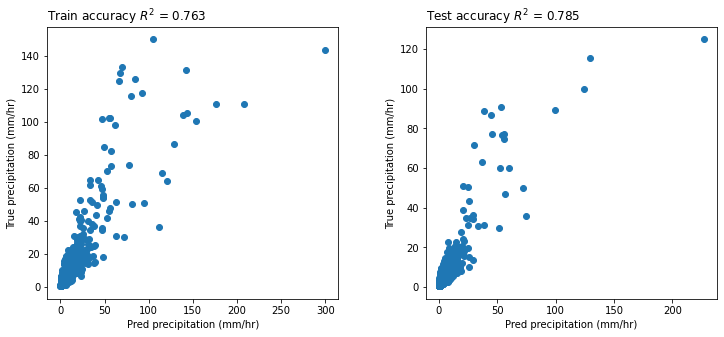

In [ ]:
# Changing the number of hidden layers
fig = plt.figure(figsize=(12,5))
count=1

## -------- Typical model building lies withing this block -------- ##
model = Sequential() 
# Every model which has to transfer information between several layers will be called upon by the Sequential() function.
model.add(Dense(12, input_dim=x_train.shape[1], activation='sigmoid')) 
model.add(Dense(12, activation='sigmoid')) 
model.add(Dense(1)) 
# Final layer is the output layer, which have one neuron and no activation function.
model.compile(optimizer='adam', loss='mean_squared_error')  
# The adam gradient optimizer with MSE cost is used for optimization.
## -------- Typical model building lies withing this block -------- ##

model.summary() # summary() visualizes the built model.

## -------- Model training lies withing this block -------- ##
# model.fit(train_X, train_y, validation_data=(test_X, test_y),verbose=2, epochs=20)
history = model.fit(x_train, y_train, validation_split=0.1,verbose=2, epochs=300,batch_size=16) 
# 10% of training samples are used for validation of the model, which will let us know whether the learning curves.
## -------- Model training lies withing this block -------- ##

## -------- Plotting of identity maps with the obtained accuracy values lies within this block -------- ##
ax = fig.add_subplot(1,2,count) # represent 11 input sizes and two columns of figures
prediction = model.predict(x_train)
inverse_prediction = y_scaler.inverse_transform(prediction)
inverse_y_train = y_scaler.inverse_transform(y_train)
ax.scatter(inverse_y_train,inverse_prediction)
R2 = round(r2_score(inverse_y_train,inverse_prediction),3)
print('ANN training accuracy $R^2$ = ',R2)
ax.set_title('Train accuracy $R^2$ = '+str(R2),loc='left')
ax.set_ylabel('True precipitation (mm/hr)')
ax.set_xlabel('Pred precipitation (mm/hr)')

count = count+1
prediction = model.predict(x_test)

inverse_prediction = y_scaler.inverse_transform(prediction)
inverse_y_test = y_scaler.inverse_transform(y_test)

ax = fig.add_subplot(1,2,count)
ax.scatter(inverse_y_test,inverse_prediction)
R2 = round(r2_score(inverse_y_test,inverse_prediction),3)
print('ANN testing accuracy $R^2$ = ',R2)
ax.set_title('Test accuracy $R^2$ = '+str(R2),loc='left')
ax.set_ylabel('True precipitation (mm/hr)')
ax.set_xlabel('Pred precipitation (mm/hr)')
count = count+1
plt.subplots_adjust(wspace=0.3,hspace=0.5)
## -------- Plotting of identity maps with the obtained accuracy values lies within this block -------- ##

2. Now let us check the effect of number of neurons. for this we build an ANN with one input, one output, and two hidden layer with 6 neurons in each. Sigmoid is taken as the nonlinearity at each node, except the output neuron.

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 6)                 12        
                                                                 
 dense_24 (Dense)            (None, 6)                 42        
                                                                 
 dense_25 (Dense)            (None, 1)                 7         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
171/171 - 1s - loss: 1.0657 - val_loss: 2.1622 - 523ms/epoch - 3ms/step
Epoch 2/300
171/171 - 0s - loss: 1.0011 - val_loss: 2.1110 - 188ms/epoch - 1ms/step
Epoch 3/300
171/171 - 0s - loss: 0.9714 - val_loss: 2.0676 - 198ms/epoch - 1ms/step
Epoch 4/300
171/171 - 0s - loss: 0.9420 - val_loss: 2.0177 - 171ms/epo

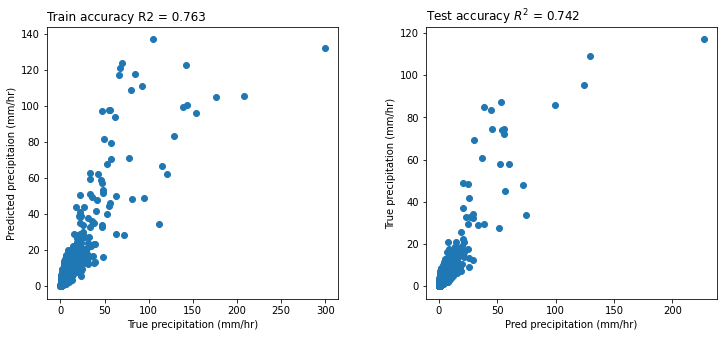

In [ ]:
# Changing the number of Neurons
fig = plt.figure(figsize=(12,5))
count=1
##------------typical model building lies within this block------------------##
model = Sequential()
model.add(Dense(6, input_dim=x_train.shape[1], activation='sigmoid'))
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(1))
# Final layer is the output layer which has one neuron and no activation function
model.compile(optimizer='adam', loss='mean_squared_error')
# The adam gradient optimizer with MSE cost is used foroptimisation.
##-----------Typical mosel building lies within this code--------##
model.summary()

##------Typical model training lies within this block--------##
history = model.fit(x_train, y_train, validation_split=0.1, verbose=2, epochs=300, batch_size=16)
# 10% of training samples are used for validation of the model, which will let us know whether the learning curves.
## -------- Model training lies withing this block -------- ##

## -----plotting of identity maps with the obtained accuracy scores lies within this block------##
ax = fig.add_subplot(1,2,count) # represent 11 input sizes and two columns of figures
prediction = model.predict(x_train)
inverse_prediction = y_scaler.inverse_transform(prediction)
inverse_y_train = y_scaler.inverse_transform(y_train) 
ax.scatter(inverse_y_train, inverse_prediction)
R2 = round(r2_score(inverse_y_train, inverse_prediction),3)
print(f'ANN Training accuracy R2 is {R2}')
ax.set_title(f'Train accuracy R2 = {R2}', loc='left')
ax.set_xlabel('True precipitation (mm/hr)')
ax.set_ylabel('Predicted precipitaion (mm/hr)')

count = count+1
prediction = model.predict(x_test)

inverse_prediction = y_scaler.inverse_transform(prediction)
inverse_y_test = y_scaler.inverse_transform(y_test)

ax = fig.add_subplot(1,2,count)
ax.scatter(inverse_y_test, inverse_prediction)
R2 = round(r2_score(inverse_prediction, inverse_y_test),3)
print('ANN testing accuracy $R^2$ = ',R2)
ax.set_title('Test accuracy $R^2$ = '+str(R2),loc='left')
ax.set_ylabel('True precipitation (mm/hr)')
ax.set_xlabel('Pred precipitation (mm/hr)')
count = count+1
plt.subplots_adjust(wspace=0.3,hspace=0.5)
## -------- Plotting of identity maps with the obtained accuracy values lies within this block -------- ##


3.Now, to examine the influence of activation functions, one new ANN model is built with one input, one output, and two hidden layer with 12 neurons in each. Rectified Linear Unit (ReLU) is taken as the nonlinearity at each node, except the output neuron.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 12)                24        
                                                                 
 dense_8 (Dense)             (None, 12)                156       
                                                                 
 dense_9 (Dense)             (None, 1)                 13        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
171/171 - 1s - loss: 0.6612 - val_loss: 1.3093 - 599ms/epoch - 4ms/step
Epoch 2/300
171/171 - 0s - loss: 0.5203 - val_loss: 1.0726 - 184ms/epoch - 1ms/step
Epoch 3/300
171/171 - 0s - loss: 0.4490 - val_loss: 1.0163 - 171ms/epoch - 1ms/step
Epoch 4/300
171/171 - 0s - loss: 0.4088 - val_loss: 0.8875 - 188ms/e

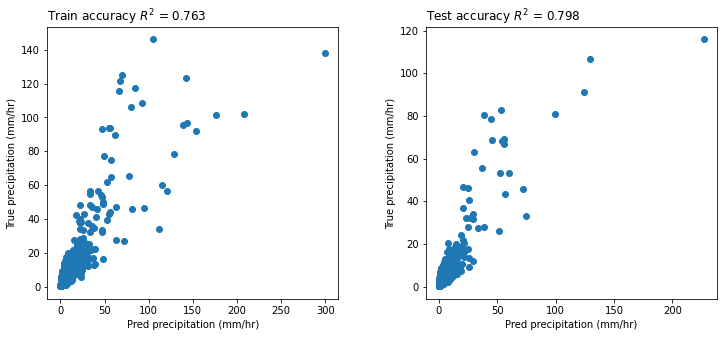

In [ ]:
# Changing the activation function
fig = plt.figure(figsize=(12,5))
count=1

##------- Typical model building lies within this block--------##
model = Sequential()
''' Every model which has to transfer information between several layers will be called 
upon by the Sequential() function'''
model.add(Dense(12, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1))
# final layer is the output layer, which have one neuron and no activation function
model.compile(optimizer='adam', loss='mean_squared_error')
# The adam gradient optimizer with MSE cost is used for optimisation
##-------------- typical model building lies within this block---------##
model.summary() # summary() visualizes the built model

## -------- Model training lies withing this block -------- ##
# model.fit(train_X, train_y, validation_data=(test_X, test_y),verbose=2, epochs=20)
history = model.fit(x_train, y_train, validation_split=0.1,verbose=2, epochs=300,batch_size=16) 
# 10% of training samples are used for validation of the model, which will let us know whether the learning curves.
## -------- Model training lies withing this block -------- ##

## -------- Plotting of identity maps with the obtained accuracy values lies within this block -------- ##
ax = fig.add_subplot(1,2,count) # represent 11 input sizes and two columns of figures
prediction = model.predict(x_train)
inverse_prediction = y_scaler.inverse_transform(prediction)
inverse_y_train = y_scaler.inverse_transform(y_train)
ax.scatter(inverse_y_train,inverse_prediction)
R2 = round(r2_score(inverse_y_train,inverse_prediction),3)
print('ANN training accuracy $R^2$ = ',R2)
ax.set_title('Train accuracy $R^2$ = '+str(R2),loc='left')
ax.set_ylabel('True precipitation (mm/hr)')
ax.set_xlabel('Pred precipitation (mm/hr)')

count = count+1
prediction = model.predict(x_test)

inverse_prediction = y_scaler.inverse_transform(prediction)
inverse_y_test = y_scaler.inverse_transform(y_test)

ax = fig.add_subplot(1,2,count)
ax.scatter(inverse_y_test,inverse_prediction)
R2 = round(r2_score(inverse_y_test,inverse_prediction),3)
print('ANN testing accuracy $R^2$ = ',R2)
ax.set_title('Test accuracy $R^2$ = '+str(R2),loc='left')
ax.set_ylabel('True precipitation (mm/hr)')
ax.set_xlabel('Pred precipitation (mm/hr)')
count = count+1
plt.subplots_adjust(wspace=0.3,hspace=0.5)
## -------- Plotting of identity maps with the obtained accuracy values lies within this block -------- ##


# ANN Logistic regression with Binary classification

In [ ]:
stratiform_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Lecture-11/typePrecip_Zfactor_2.xlsx',sheet_name='stratiform',usecols='A,B,D,E')
convective_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Lecture-11/typePrecip_Zfactor_2.xlsx',sheet_name='convective',usecols='A,B,D,E')
data = pd.concat([stratiform_data, convective_data], ignore_index=True)
data

,3 km,8 km,flagBB.1,classification
0,18.79,14.70,0,0
1,14.81,16.34,0,0
2,19.06,18.15,0,0
3,16.90,16.62,0,0
4,15.71,15.66,0,0
...,...,...,...,...
1551,24.04,21.77,0,1
1552,29.27,21.80,0,1
1553,35.24,14.97,0,1
1554,29.08,18.29,0,1


The dataset contains reflectivity at 3 km and 8 km, flag of the existence of the Bright Band(BB), and the corresponding rainfall classification. The reflectivity at 3 km, 8km and the BB flag are served as inputs and we want to PREDICT rainfall category from this, which serves as output. The category indicates 0 if it is stratiform and 1 if it is convective.


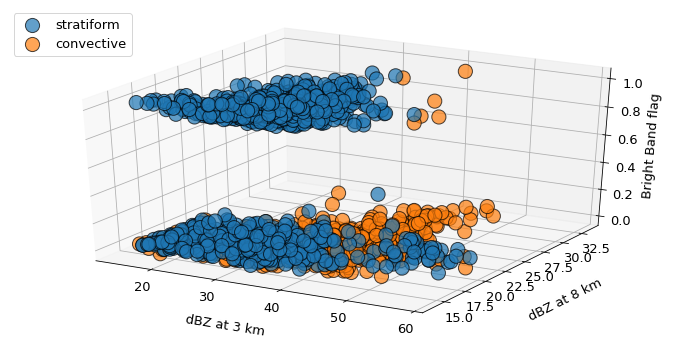

In [ ]:
plt.rc('font', size=13)    # fontsize of the all text
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stratiform_data.iloc[:,0],stratiform_data.iloc[:,1],stratiform_data.iloc[:,2],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,label='stratiform')
ax.scatter(convective_data.iloc[:,0],convective_data.iloc[:,1],convective_data.iloc[:,2],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,label='convective')
ax.set_xlabel('dBZ at 3 km',labelpad=20)
ax.set_ylabel('dBZ at 8 km',labelpad=20)
ax.set_zlabel('Bright Band flag')
plt.legend(loc='upper left')

# Data Normalisation

In [ ]:
X = np.array(data.iloc[:,0:3])
y = np.array(data.iloc[:,3]).reshape(-1,1)
scaled_X = X
scaled_X[:,0:2] = scaled_X[:,0:2]/70 # Reflectivity fields are divided with 70 dBZ.
scaled_y = y # since the output is a binary classification(0,1), normalisation is not required.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.3, random_state=1)
print(f"Train_X shape: {X_train.shape}",f"Train_y shape: {y_train.shape}",f"Test_X shape: {X_test.shape}",f"Test_y shape: {y_test.shape}")


Train_X shape: (1089, 3) Train_y shape: (1089, 1) Test_X shape: (467, 3) Test_y shape: (467, 1)


Build Artificial Neural Network (ANN) model with three input neurons, one output neuron, and three hidden layers with 12, 12, and 12 neurons each. Take the sigmoid as the nonlinearity at each node. The output layer will have a sigmoid nonlinearity to obtain the classifications.

In [ ]:
## -------- Typical model building lies withing this block -------- ##
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True))
## -------- Typical model building lies withing this block -------- ##
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 373
Trainable params: 373
Non-trainable params: 0
_________________________________________________________________


Epoch 1/300


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


62/62 - 2s - loss: 0.7119 - val_loss: 0.6840 - 2s/epoch - 28ms/step
Epoch 2/300
62/62 - 0s - loss: 0.6429 - val_loss: 0.6963 - 199ms/epoch - 3ms/step
Epoch 3/300
62/62 - 0s - loss: 0.6355 - val_loss: 0.7031 - 158ms/epoch - 3ms/step
Epoch 4/300
62/62 - 0s - loss: 0.6335 - val_loss: 0.7018 - 112ms/epoch - 2ms/step
Epoch 5/300
62/62 - 0s - loss: 0.6326 - val_loss: 0.7055 - 129ms/epoch - 2ms/step
Epoch 6/300
62/62 - 0s - loss: 0.6317 - val_loss: 0.6996 - 135ms/epoch - 2ms/step
Epoch 7/300
62/62 - 0s - loss: 0.6298 - val_loss: 0.6967 - 126ms/epoch - 2ms/step
Epoch 8/300
62/62 - 0s - loss: 0.6277 - val_loss: 0.6965 - 127ms/epoch - 2ms/step
Epoch 9/300
62/62 - 0s - loss: 0.6246 - val_loss: 0.6920 - 132ms/epoch - 2ms/step
Epoch 10/300
62/62 - 0s - loss: 0.6215 - val_loss: 0.6860 - 175ms/epoch - 3ms/step
Epoch 11/300
62/62 - 0s - loss: 0.6134 - val_loss: 0.6734 - 237ms/epoch - 4ms/step
Epoch 12/300
62/62 - 0s - loss: 0.6039 - val_loss: 0.6596 - 251ms/epoch - 4ms/step
Epoch 13/300
62/62 - 0s - l

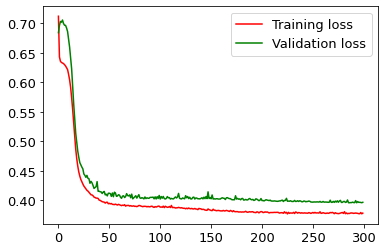

In [ ]:
## -------- Model training lies withing this block -------- ##
history = model.fit(X_train, y_train, validation_split=0.1,verbose=2, epochs=300,batch_size=16)
## -------- Model training lies withing this block -------- ##
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.legend(['Training loss','Validation loss'])

Time to obtain the model predictions corresponding to training and testing samples, to examine the model accuracy

In [ ]:
train_prediction = model.predict(X_train)
train_prediction

array([[0.31042373],
       [0.12256563],
       [0.39830944],
       ...,
       [0.7240906 ],
       [0.01725867],
       [0.7938286 ]], dtype=float32)

In [ ]:
onehot_train_prediction = np.array([train_prediction>=0.5],dtype=int).reshape(-1,1)
onehot_train_prediction

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [ ]:
train_accuracy = round(np.sum(onehot_train_prediction==y_train)/len(y_train),3)
print('Training accuracy is ',str(train_accuracy))

Training accuracy is  0.811


In [ ]:
test_prediction = model.predict(X_test)
onehot_test_prediction = np.array([test_prediction>=0.5],dtype=int).reshape(-1,1)
test_accuracy = round(np.sum(onehot_test_prediction==y_test)/len(y_test),3)
print('Testing accuracy is ',str(test_accuracy))

Testing accuracy is  0.859


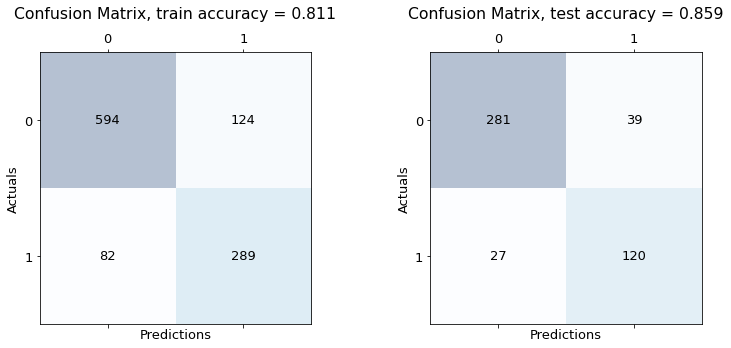

In [ ]:
## -------- Plotting of confision matrics with the obtained accuracy values lies within this block -------- ##
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1) # represent 11 input sizes and two columns of figures
train_conf_matrix = confusion_matrix(y_true=y_train, y_pred=onehot_train_prediction)
ax.matshow(train_conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(train_conf_matrix.shape[0]):
    for j in range(train_conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=train_conf_matrix[i, j], va='center', ha='center')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix, train accuracy = '+str(train_accuracy),pad=20)

test_conf_matrix = confusion_matrix(y_true=y_test, y_pred=onehot_test_prediction)
ax = fig.add_subplot(1,2,2)
ax.matshow(test_conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(test_conf_matrix.shape[0]):
    for j in range(test_conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=test_conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix, test accuracy = '+str(test_accuracy),pad=20)
plt.subplots_adjust(wspace=0.4,hspace=0.6)  
## -------- Plotting of confision matrics with the obtained accuracy values lies within this block -------- ##

So far, we have seen the performance of ANN for nonlinear and logistic regression examples. The results shown to be promissing and playing with the hyperparameters might even improve by accuracy.

Now, consider a new problem, in which we are tasked to predict the annual precipitation of future years over the Indian subcontinent, provided with the annual precipitation of the previous years.

Lets see how the ANN performs for such problems.

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Lecture-11/Indian rainfall data.xlsx',header=1,index_col='YEAR',parse_dates=True)
data


,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JF,MAM,JJAS,OND,ANN
YEAR,,,,,,,,,,,,,,,,,
1871-01-01,196,107,145,339,636,2080,2778,1794,1836,368,324,67,303,1120,8487,758,10670
1872-01-01,76,75,73,240,438,1892,2913,2452,1879,785,276,191,151,751,9136,1252,11289
1873-01-01,37,135,150,243,428,1130,2645,2142,1656,607,115,90,172,821,7573,812,9378
1874-01-01,86,158,107,169,683,2279,3069,2335,2062,932,187,40,244,959,9745,1159,12106
1875-01-01,99,114,131,232,506,1926,3079,2187,2105,566,63,71,213,869,9297,700,11078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-01,182,25,39,343,252,1127,2520,2576,1828,650,344,57,207,634,8051,1051,9943
2013-01-01,47,265,99,273,549,2285,3122,2467,1599,1397,149,39,312,921,9473,1584,12291
2014-01-01,133,233,211,134,648,908,2564,2190,1702,618,150,99,366,993,7364,867,9590


# Extracting Annual mean rainfall and normalising it

In [ ]:
singled_data = np.array(data.iloc[:,-1]).reshape(-1,1) # Extracting the annual mean rainfall
scaler = StandardScaler().fit(singled_data)
scaled_dataset = scaler.transform(singled_data) # scaling the dataset to a standard scaler
scaled_dataset

array([[-1.56939216],
       [ 0.72271918],
       [-1.20366441],
       ...,
       [-1.62388281],
       [-0.08980777],
       [-0.78900382]])

# Converting the data into input and output datassets

Since the data is sequential, we can convert it into inputs and outputs by considering the previous n years rainfall as input and the next 1 year as the target (output).

Suppose, we wants to utilize the past 3 years of rainfall as inputs and predict the 4th year rainfall, this case, the three years of rainfall will be the input and the 4th year rainfall as the output.

Define a function, that takes some data points and appends input and output vectors based on the seqence number. Lets say, we provided 10 data points, and expected to output it into 3 points as input and the next 1 point as output, then, it should produce 10-3+1 = 8 samples of inputs (3) and targets(1).

In [ ]:
def to_sequences(dataset, seq_count=1,seq_min=1):
    x = []
    y = []
    for i in range(seq_count+seq_min,len(dataset)-1):
        #print(i)
        j = np.concatenate((i-np.arange(seq_count,0,-1),i-np.arange(seq_min,0,-1)))
        #print(j)
        window = np.array(dataset[j]).reshape(-1)
        x.append(window)
        y.append(dataset[i])
    return np.array(x),np.array(y)

In [ ]:
seq_count = 3
X,y = to_sequences(scaled_dataset,seq_count=seq_count,seq_min=0)  # seq_count is the number of months
print(f'X shape: {X.shape}',f'y shape: {y.shape}')

X shape: (4327, 3) y shape: (4327, 1)


In [ ]:
X

array([[-1.56939216,  0.72271918, -1.20366441],
       [ 0.72271918, -1.20366441,  0.28486079],
       [-1.20366441,  0.28486079,  1.56859296],
       ...,
       [-1.18626607, -0.89871006, -0.89967663],
       [-0.89871006, -0.89967663, -1.64393924],
       [-0.89967663, -1.64393924, -1.62388281]])

From the 142 samples, the precipitation data till 2006 year is used for training, whereas the remining 10 years dataset is uset for testing.

In [ ]:
train_X = X[0:-10,:]
train_y = y[0:-10,:]
test_X = X[-10:,:]
test_y = y[-10:,:]
#train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)
print(f"Train_X shape: {train_X.shape}",f"Train_y shape: {train_y.shape}",f"Test_X shape: {test_X.shape}",f"Test_y shape: {test_y.shape}")

Train_X shape: (4317, 3) Train_y shape: (4317, 1) Test_X shape: (10, 3) Test_y shape: (10, 1)


Build an ANN model with three input neurons, one output neuron, and 3 hidden layers with 12 neurons in each. Take the sigmoid as the nonlinearity at each node. The output layer will not have any nonlinearity.

In [ ]:
##------------Typical model building lies within this block------------##
model = Sequential()
model.add(Dense(12, input_dim=train_X.shape[1], activation='sigmoid'))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
##----------Typical model building lies within this block------------##
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                48        
                                                                 
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 dense_4 (Dense)             (None, 12)                156       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 373
Trainable params: 373
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
243/243 - 2s - loss: 0.9920 - val_loss: 0.7797 - 2s/epoch - 7ms/step
Epoch 2/500
243/243 - 0s - loss: 0.7715 - val_loss: 0.6368 - 420ms/epoch - 2ms/step
Epoch 3/500
243/243 - 0s - loss: 0.6162 - val_loss: 0.5695 - 411ms/epoch - 2ms/step
Epoch 4/500
243/243 - 0s - loss: 0.5615 - val_loss: 0.5623 - 412ms/epoch - 2ms/step
Epoch 5/500
243/243 - 0s - loss: 0.5329 - val_loss: 0.5425 - 391ms/epoch - 2ms/step
Epoch 6/500
243/243 - 0s - loss: 0.5192 - val_loss: 0.5588 - 403ms/epoch - 2ms/step
Epoch 7/500
243/243 - 0s - loss: 0.5123 - val_loss: 0.5314 - 362ms/epoch - 1ms/step
Epoch 8/500
243/243 - 0s - loss: 0.5088 - val_loss: 0.5468 - 420ms/epoch - 2ms/step
Epoch 9/500
243/243 - 0s - loss: 0.5062 - val_loss: 0.5299 - 411ms/epoch - 2ms/step
Epoch 10/500
243/243 - 0s - loss: 0.5035 - val_loss: 0.5286 - 370ms/epoch - 2ms/step
Epoch 11/500
243/243 - 0s - loss: 0.5021 - val_loss: 0.5709 - 377ms/epoch - 2ms/step
Epoch 12/500
243/243 - 0s - loss: 0.5032 - val_loss: 0.5298 - 356ms/epoch - 1

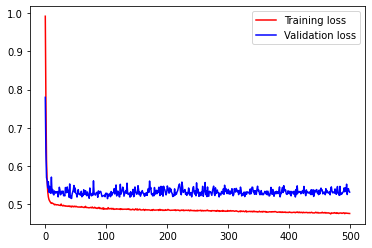

In [ ]:
##-----------Model training lies within this block----------##
history = model.fit(train_X, train_y, validation_split=0.1, verbose=2, epochs=500, batch_size=16)
##----------Model training lies within this block-----------##

plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend(['Training loss', 'Validation loss'])


Time to obtain the model predictions corresponding to training and testing samples, to examine the model accuracy

In [ ]:
train_prediction = model.predict(train_X) 
inverse_train_prediction = scaler.inverse_transform(train_prediction)
inverse_train_y = scaler.inverse_transform(train_y)
train_R2 = round(r2_score(inverse_train_y,inverse_train_prediction),3)
print('ANN training accuracy $R^2$ = ',train_R2)

ANN training accuracy $R^2$ =  0.52


In [ ]:
test_prediction = model.predict(test_X) 
inverse_test_prediction = scaler.inverse_transform(test_prediction)
inverse_test_y = scaler.inverse_transform(test_y)
test_R2 = round(r2_score(inverse_test_y,inverse_test_prediction),3)
print('ANN testing accuracy $R^2$ = ',test_R2)

ANN testing accuracy $R^2$ =  -0.89


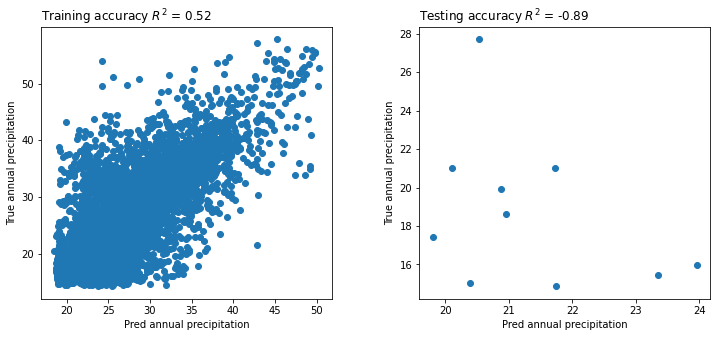

In [ ]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1) # represent 11 input sizes and two columns of figures
ax.scatter(inverse_train_prediction,inverse_train_y)
ax.set_title('Training accuracy $R^2$ = '+str(train_R2),loc='left')
ax.set_ylabel('True annual precipitation')
ax.set_xlabel('Pred annual precipitation')

ax = fig.add_subplot(1,2,2) # represent 11 input sizes and two columns of figures
ax.scatter(inverse_test_prediction,inverse_test_y)
ax.set_title('Testing accuracy $R^2$ = '+str(test_R2),loc='left')
ax.set_ylabel('True annual precipitation')
ax.set_xlabel('Pred annual precipitation')

plt.subplots_adjust(wspace=0.3,hspace=0.5)

# This clearly shows that ANN fails. The fix is inputting more data.